In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
df = pd.read_csv('train_data.csv')

In [3]:
df.head()

,prov_id,area_id,user_id,chnl_type,service_type,product_type,innet_months,total_times,total_flux,total_fee,...,active_days20,active_days21,active_days22,active_days23,game_app_flux,live_app_flux,video_app_flux,city_5g_ratio,city_level,is_5g
0,81,V0513400,5f950e1751acd6a6fa9bf88eb5560c78,7,4,5,29,1.149441,10.864754,93.000,...,4,2,0,0,0.0,0.00000,5526.494937,0.000512,7,1
1,36,V0330200,40015dd14b779d1d3d4e8e2536c6115a,7,4,3,5,0.688337,6.814911,89.912,...,2,2,0,0,0.0,0.00000,0.000000,0.000356,3,0
2,76,V0410100,72f4ddd94488cc2f30bc83b82f55d3eb,7,4,4,104,1.102318,9.492543,62.670,...,0,3,0,0,0.0,0.00000,1235.091633,0.000490,3,0
3,84,V0610100,845983a3e7973b0016c73071f4c70c1c,10,4,5,15,0.122139,5.008418,75.798,...,4,4,0,0,0.0,9.13548,1194.355876,0.000328,2,0
4,85,V0520100,0326fbd12145c5378baf5168a8e9c8fe,7,4,3,21,0.158738,9.745640,54.500,...,20,0,6,1,0.0,0.00000,26.783371,0.000830,6,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 60 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   prov_id               1000 non-null   int64  
 1   area_id               1000 non-null   object 
 2   user_id               1000 non-null   object 
 3   chnl_type             1000 non-null   int64  
 4   service_type          1000 non-null   int64  
 5   product_type          1000 non-null   int64  
 6   innet_months          1000 non-null   int64  
 7   total_times           1000 non-null   float64
 8   total_flux            1000 non-null   float64
 9   total_fee             1000 non-null   float64
 10  pay_fee               1000 non-null   float64
 11  sex                   1000 non-null   int64  
 12  age                   1000 non-null   int64  
 13  manu_name             1000 non-null   int64  
 14  term_type             1000 non-null   int64  
 15  max_rat_flag          

In [5]:
days=['active_days01', 'active_days02',
       'active_days03', 'active_days04', 'active_days05', 'active_days06',
       'active_days07', 'active_days08', 'active_days09', 'active_days10',
       'active_days11', 'active_days12', 'active_days13', 'active_days14',
       'active_days15', 'active_days16', 'active_days17', 'active_days18',
       'active_days19', 'active_days20', 'active_days21', 'active_days22',
       'active_days23']
df.drop(columns=days,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   prov_id               1000 non-null   int64  
 1   area_id               1000 non-null   object 
 2   user_id               1000 non-null   object 
 3   chnl_type             1000 non-null   int64  
 4   service_type          1000 non-null   int64  
 5   product_type          1000 non-null   int64  
 6   innet_months          1000 non-null   int64  
 7   total_times           1000 non-null   float64
 8   total_flux            1000 non-null   float64
 9   total_fee             1000 non-null   float64
 10  pay_fee               1000 non-null   float64
 11  sex                   1000 non-null   int64  
 12  age                   1000 non-null   int64  
 13  manu_name             1000 non-null   int64  
 14  term_type             1000 non-null   int64  
 15  max_rat_flag          

In [7]:
df_final = df.drop(['user_id','area_id','innet_months','total_times','total_flux','total_fee','pay_fee','age','call_days','re_call10','short_call10','long_call10','bank_cnt','game_app_flux','live_app_flux','video_app_flux'], axis = 1)

In [8]:
x = df_final.drop(['is_5g'], axis = 1)

In [9]:
y = df['is_5g']

In [10]:
x

,prov_id,chnl_type,service_type,product_type,sex,manu_name,term_type,max_rat_flag,is_5g_base_cover,is_work_5g_cover,is_home_5g_cover,is_work_5g_cover_l01,is_home_5g_cover_l01,is_work_5g_cover_l02,is_home_5g_cover_l02,activity_type,is_act_expire,comp_type,city_5g_ratio,city_level
0,81,7,4,5,1,3,4,4,0,0,0,0,0,0,0,4,1,1,0.000512,7
1,36,7,4,3,1,6,4,4,0,0,0,0,0,0,0,4,1,1,0.000356,3
2,76,7,4,4,0,5,4,4,1,1,1,1,1,1,1,3,2,6,0.000490,3
3,84,10,4,5,0,1,1,4,0,0,0,0,0,0,0,5,3,6,0.000328,2
4,85,7,4,3,1,6,4,4,0,0,0,0,0,0,0,4,1,1,0.000830,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,76,10,4,4,0,2,4,4,0,0,0,0,0,0,0,4,1,6,0.000094,7
996,18,7,1,2,1,2,4,4,0,0,0,0,0,0,0,5,3,6,0.000019,7
997,76,10,4,5,1,3,4,4,0,0,0,0,0,0,0,4,1,1,0.000094,7
998,51,9,4,3,1,5,4,4,0,0,0,0,0,0,0,4,1,1,0.000675,6


In [11]:
y

0      1
1      0
2      0
3      0
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: is_5g, Length: 1000, dtype: int64

In [12]:
#data normalisation
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

In [13]:
#Train Test Splitting

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .20, random_state= 40)

In [73]:
#Simple logistic regression
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(x_train, y_train)
pred1 = model1.predict(x_test)
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       196
           1       0.00      0.00      0.00         4

    accuracy                           0.98       200
   macro avg       0.49      0.50      0.49       200
weighted avg       0.96      0.98      0.97       200



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [74]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
model2.fit(x_train, y_train)
pred2 = model2.predict(x_test)
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       196
           1       0.09      0.25      0.13         4

    accuracy                           0.94       200
   macro avg       0.54      0.60      0.55       200
weighted avg       0.97      0.94      0.95       200



In [75]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier()
model3.fit(x_train, y_train)
pred3 = model3.predict(x_test)
print(classification_report(y_test, pred3))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       196
           1       0.00      0.00      0.00         4

    accuracy                           0.98       200
   macro avg       0.49      0.50      0.49       200
weighted avg       0.96      0.98      0.97       200



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [76]:
import xgboost
model4 = xgboost.XGBClassifier()
model4.fit(x_train,y_train)
pred4 = model4.predict(x_test)
print(classification_report(y_test, pred4))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       196
           1       0.00      0.00      0.00         4

    accuracy                           0.98       200
   macro avg       0.49      0.50      0.49       200
weighted avg       0.96      0.98      0.97       200



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [77]:
df_sample = pd.read_csv('sample.csv')

In [78]:
model_compare= pd.DataFrame(list(zip(df_sample['is_5g'],pred1, pred2, pred3, pred4)),
               columns =['ActualSet','LogisticRegression','DecisionTree','RandomForest','XGB'])

In [79]:
population=model_compare.shape[0]

In [80]:
elements,count=\
np.unique(np.where(model_compare['LogisticRegression'] == model_compare['ActualSet'],True,False),return_counts=True)
print('Count Of Correct And False: Logistic Regression')
print('Correct Predictions: {} - False Predictions: {}'.format(count[0],count[0]-model_compare['LogisticRegression'].shape[0]))
correct1=count[0]*100/population

Count Of Correct And False: Logistic Regression
Correct Predictions: 200 - False Predictions: 0


In [81]:
elements,count=\
np.unique(np.where(model_compare['DecisionTree'] == model_compare['ActualSet'],True,False),return_counts=True)
print('Count Of Correct And False: Decision Tree')
print('Correct Predictions: {} - False Predictions: {}'.format(count[1], count[0]))
correct2=count[1]*100/population

Count Of Correct And False: Decision Tree
Correct Predictions: 189 - False Predictions: 11


In [82]:
elements,count=\
np.unique(np.where(model_compare['RandomForest'] == model_compare['ActualSet'],True,False),return_counts=True)
print('Count Of Correct And False: Random Forest')
print('Correct Predictions: {} - False Predictions: {}'.format(count[0], count[0]-model_compare['RandomForest'].shape[0]))
correct3=count[0]*100/population

Count Of Correct And False: Random Forest
Correct Predictions: 200 - False Predictions: 0


In [88]:
elements,count=\
np.unique(np.where(model_compare['XGB'] == model_compare['ActualSet'],True,False),return_counts=True)
print('Count Of Correct And False: XGBoost')
print('Correct Predictions: {} - False Predictions: {}'.format(count[0], count[0]-model_compare['XGB'].shape[0]))
correct4=count[0]*100/population

Count Of Correct And False: XGBoost
Correct Predictions: 200 - False Predictions: 0


In [122]:
acc={'Logistic Regression':correct1,'Decision Tree':correct2,'Random Forest':correct3,'XGBoost':correct4}

In [129]:
acc=sorted(acc.items(), reverse=True)

In [127]:
acc=dict(acc)

In [128]:
acc

{'XGBoost': 100.0,
 'Random Forest': 100.0,
 'Logistic Regression': 100.0,
 'Decision Tree': 94.5}

In [130]:
x, y = zip(*acc)

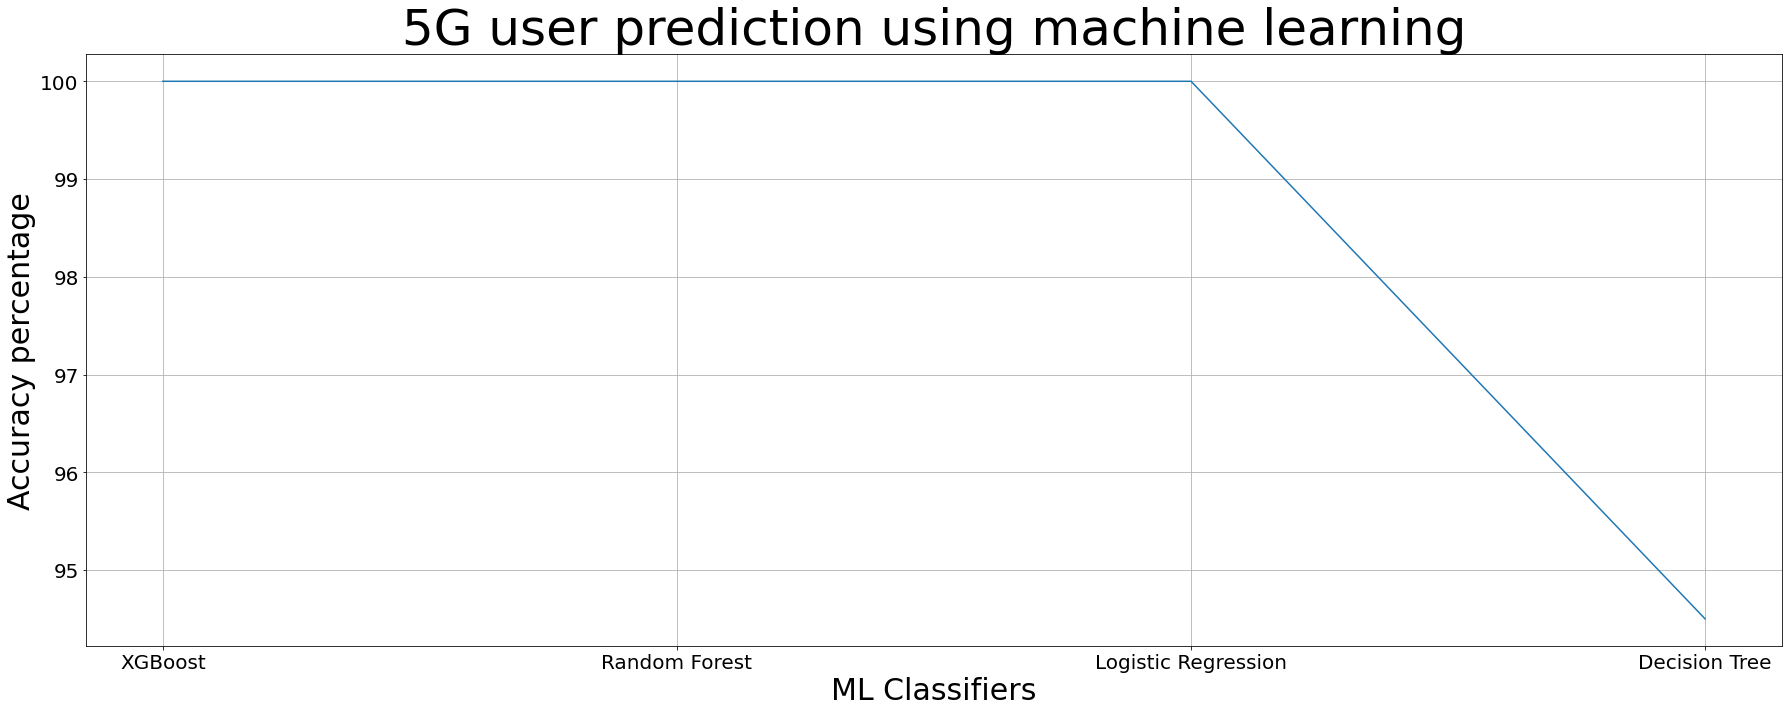

In [134]:
plt.figure(figsize=[25,10])
plt.plot(x, y)
plt.ylabel('Accuracy percentage',fontsize=30)
plt.xlabel('ML Classifiers',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('5G user prediction using machine learning',fontsize=50)
plt.grid()
plt.tight_layout()